# LISA cluster maps with PySal
Using https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/darribas/657e0568df7a63362762/raw/pysal_lisa_maps.ipynb

Dani Arribas-Bel's LISA example uses PySal 1.4 (or earlier - Nathanael Rosenheim could not get it to work)

PySal 2.0.0 has an example - will try to merge the 2:

https://nbviewer.jupyter.org/github/pysal/esda/blob/master/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb

Dani Arribas-Bel (@darribas)
This notebook is available as a gist, or viewable online as static html.

Local Indicators of Spatial Association (LISAs, Anselin, 1995) are a common tool to explore spatial heterogeneity, identify spatial concentration of (dis)similar values and test for the probability such agglomerations originate from a random process.

PySAL has had functionality to run LISAs since its very beginning. However, the output of such computation is not very useful just by itself as, being a local statistic, LISAs imply running a test for every single observation. The usual approach has been to visualize significant clusters on a map using a simple color coding for each class (High-High, HH; Low-Low, LL; High-Low, HL; Low-High, LH). Such visualiations have been available for a long time in packages such as GeoDa, but this would imply breaking the workflow to switch between Python and GeoDa, plus with the annoyance that the workflow cannot thus be automated, a convenient feature for reproducible science.

In this notebook, we show how to leverage the visualization layer that is being built in PySAL to create generic and custom LISA cluster maps.

## Other possible helpful pages:

http://darribas.org/gds_scipy16/ipynb_md/04_esda.html

PySal v 2.0.0 help
https://pysal.readthedocs.io/en/latest/

PySal v 1.1. help
https://pysal.readthedocs.io/en/v1.11.0/index.html#

PySal Homepage - https://pysal.org/


## Set up
For this example, we will use the NAT dataset, included in PySAL by default, exploring the variable HR90, homicide rates in 1990 at the county level.

Let's start by importing the required code. This is all code that will be made available in the upcoming release of PySAL in July 2015 (if you're reading this afterwards, it's all in there by default!).

## Error Log
Several errors in getting the project to replicate: Found solultions here

pysal needs to be pysal 1.14

https://github.com/darribas/gds18/commit/23b5eab003b6ad88f85f40327936b03ea445b0f2

Actually it looks like PySal 2.0.0 has really good help information

https://pysal.readthedocs.io/en/latest/



In [4]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import esda

In [111]:
import pysal as ps
import numpy as np

import pandas as pd
import geopandas as gpd

# Core components of PySAL A library of spatial analysis functions
import libpysal as lps

import matplotlib.pyplot as plt

%matplotlib inline

## Find the NAT Dataset - included in PySal

In [7]:
shp_link = ps.lib.examples.get_path('NAT.shp')
print('Reading from ', shp_link)

Reading from  C:\Users\nathanael99\AppData\Local\Continuum\anaconda3\envs\pyincore20190618\lib\site-packages\pysal\lib\examples\nat\NAT.shp


In [8]:
dbf_link = shp_link.replace('.shp', '.dbf')
print('Reading from ', dbf_link)

Reading from  C:\Users\nathanael99\AppData\Local\Continuum\anaconda3\envs\pyincore20190618\lib\site-packages\pysal\lib\examples\nat\NAT.dbf


## Read in 1 column from the NAT Dataset as a Numpy Arrary

In [9]:
df = gpd.read_file(shp_link)

In [10]:
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,POLYGON ((-95.34258270263672 48.54670333862305...
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,POLYGON ((-118.8505020141602 47.94968795776367...
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,POLYGON ((-117.4377746582031 48.04421997070313...
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,POLYGON ((-118.9709625244141 47.93927764892578...
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-117.4375 48.99999618530273, -117.03..."


In [127]:
list(df.columns.values)

['HR90',
 'NAME',
 'STATE_NAME',
 'STATE_FIPS',
 'CNTY_FIPS',
 'FIPS',
 'STFIPS',
 'COFIPS',
 'FIPSNO',
 'SOUTH',
 'HR60',
 'HR70',
 'HR80',
 'HC60',
 'HC70',
 'HC80',
 'HC90',
 'PO60',
 'PO70',
 'PO80',
 'PO90',
 'RD60',
 'RD70',
 'RD80',
 'RD90',
 'PS60',
 'PS70',
 'PS80',
 'PS90',
 'UE60',
 'UE70',
 'UE80',
 'UE90',
 'DV60',
 'DV70',
 'DV80',
 'DV90',
 'MA60',
 'MA70',
 'MA80',
 'MA90',
 'POL60',
 'POL70',
 'POL80',
 'POL90',
 'DNL60',
 'DNL70',
 'DNL80',
 'DNL90',
 'MFIL59',
 'MFIL69',
 'MFIL79',
 'MFIL89',
 'FP59',
 'FP69',
 'FP79',
 'FP89',
 'BLK60',
 'BLK70',
 'BLK80',
 'BLK90',
 'GI59',
 'GI69',
 'GI79',
 'GI89',
 'FH60',
 'FH70',
 'FH80',
 'FH90',
 'geometry',
 'lag_hr90',
 'LISA_p',
 'LISA_cluster',
 'LISA_cluster_labels']

For this example, we will use the NAT dataset, included in PySAL by default, exploring the variable HR90, homicide rates in 1990 at the county level.

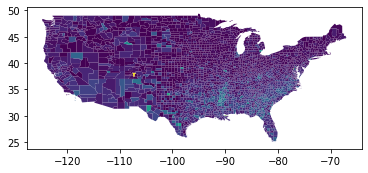

In [24]:
df.plot(column='HR90')

## Summary Statistics for HR90

In [25]:
hr90 = np.array(df['HR90'])
print(hr90)

[ 0.         15.88562351  6.46245315 ...  4.36732988  3.72771194
  2.04885495]


In [27]:
print("Mean Homicide Rate:       ", hr90.mean())
print("Standard deviation:       ", hr90.std())
print("Minimum Homicide Rate:    ", hr90.min())
print("Maximum Homicide Rate:    ", hr90.max())

Mean Homicide Rate:        6.182859609752026
Standard deviation:        6.6403307670741585
Minimum Homicide Rate:     0.0
Maximum Homicide Rate:     71.377587438


In [28]:
print("25th percentile:   ", np.percentile(hr90, 25))
print("Median:            ", np.median(hr90))
print("75th percentile:   ", np.percentile(hr90, 75))

25th percentile:    1.3337601366
Median:             4.3765352065
75th percentile:    8.9376832991


In [125]:
# Move the HR90 column to the front
cols = ['HR90']  + [col for col in df if col != 'HR90']
df = df[cols]
df.sort_values(by=['HR90'])
df.head()

,HR90,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,...,GI89,FH60,FH70,FH80,FH90,geometry,lag_hr90,LISA_p,LISA_cluster,LISA_cluster_labels
0,0.000000,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,...,0.336455,11.279621,5.4,5.663881,9.515860,POLYGON ((-95.34258270263672 48.54670333862305...,4.329494,0.364,0,0 ns
1,15.885624,Ferry,Washington,53,019,53019,53,19,53019,0,...,0.360640,10.053476,2.6,10.079576,11.397059,POLYGON ((-118.8505020141602 47.94968795776367...,4.486318,0.364,0,0 ns
2,6.462453,Stevens,Washington,53,065,53065,53,65,53065,0,...,0.369942,9.258437,5.6,6.812127,10.352015,POLYGON ((-117.4377746582031 48.04421997070313...,6.924771,0.326,0,0 ns
3,6.996502,Okanogan,Washington,53,047,53047,53,47,53047,0,...,0.394519,9.039900,8.1,10.084926,12.840340,POLYGON ((-118.9709625244141 47.93927764892578...,5.307922,0.414,0,0 ns
4,7.478033,Pend Oreille,Washington,53,051,53051,53,51,53051,0,...,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-117.4375 48.99999618530273, -117.03...",4.638703,0.358,0,0 ns


In [126]:
df.loc[df.HR90 > np.percentile(hr90,99)]

,HR90,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,...,GI89,FH60,FH70,FH80,FH90,geometry,lag_hr90,LISA_p,LISA_cluster,LISA_cluster_labels
381,34.657240,Hot Springs,Wyoming,56,017,56017,56,17,56017,0,...,0.351486,8.563900,7.900000,7.203115,8.851500,"POLYGON ((-107.596076965332 43.50566101074219,...",4.047303,0.311,0,0 ns
978,29.284818,Philadelphia,Pennsylvania,42,101,42101,42,101,42101,0,...,0.405895,19.186188,18.900000,27.288160,31.765699,POLYGON ((-75.14328002929688 39.88148880004883...,4.273171,0.257,0,0 ns
1153,35.415993,Baltimore City,Maryland,24,510,24510,24,510,24510,1,...,0.420159,19.295725,21.600000,32.528858,38.854609,"POLYGON ((-76.57698059082031 39.1981201171875,...",6.015718,0.432,0,0 ns
1193,36.499681,Lincoln,Kansas,20,105,20105,20,105,20105,0,...,0.353903,8.553055,6.600000,6.138934,4.939422,POLYGON ((-97.92641448974609 38.86203765869141...,1.777982,0.015,4,4 diamond
1251,64.260999,Washington,District of Columbia,11,001,11001,11,1,11001,1,...,0.419867,22.939671,25.200000,35.746373,39.190808,POLYGON ((-77.00823211669922 38.96655654907227...,9.450688,0.128,0,0 ns
1292,43.947549,St. Louis City,Missouri,29,510,29510,29,510,29510,0,...,0.425420,19.903624,21.200000,30.281788,36.982136,"POLYGON ((-90.26123046875 38.53276824951172, -...",11.265550,0.062,0,0 ns
1453,71.377587,Hinsdale,Colorado,08,053,08053,8,53,8053,0,...,0.372236,11.475410,0.000000,6.194690,8.510638,POLYGON ((-107.4769058227539 37.42544174194336...,1.789475,0.013,4,4 diamond
1578,45.636015,Richmond City,Virginia,51,760,51760,51,760,51760,1,...,0.437192,22.435072,20.300000,28.970527,34.890748,POLYGON ((-77.42465209960938 37.43642807006836...,7.233525,0.325,0,0 ns
1600,33.095049,Owsley,Kentucky,21,189,21189,21,189,21189,1,...,0.512538,12.412178,9.400000,11.354839,11.212334,POLYGON ((-83.53109741210938 37.26095581054688...,13.449275,0.014,1,1 hot spot
1766,39.186569,Martinsville,Virginia,51,690,51690,51,690,51690,1,...,0.408566,14.704614,14.000000,19.783957,26.550218,POLYGON ((-79.83490753173828 36.70063781738281...,15.805557,0.091,0,0 ns


In [37]:
# https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial
import seaborn; seaborn.set()  # set plot style
seaborn.set_style("ticks")

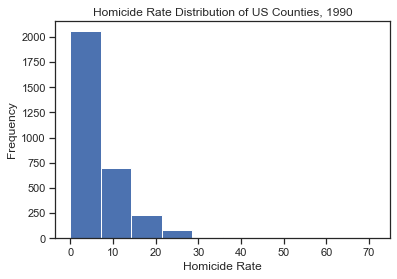

In [36]:
plt.hist(hr90)
plt.title('Homicide Rate Distribution of US Counties, 1990')
plt.xlabel('Homicide Rate')
plt.ylabel('Frequency');

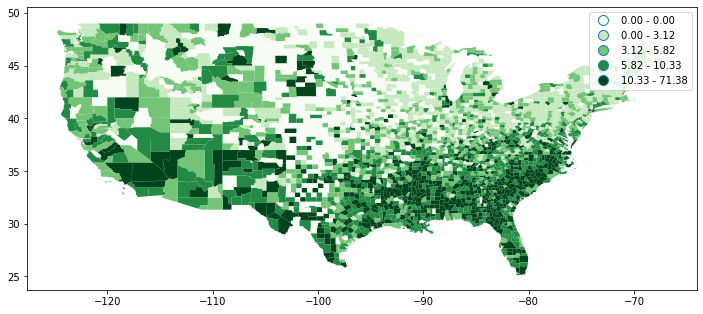

In [14]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='HR90', scheme='Quantiles', k=5, cmap='Greens', legend=True, ax=ax)

## Spatial Similarity
We have already encountered spatial weights in a previous notebook. In spatial autocorrelation analysis, the spatial weights are used to formalize the notion of spatial similarity. As we have seen there are many ways to define spatial weights, here we will use queen contiguity:

In [15]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [18]:
wq

In [19]:
y = df['HR90']
ylag = lps.weights.lag_spatial(wq, y)

In [20]:
ylag

array([ 4.32949355,  4.4863183 ,  6.92477055, ..., 10.99696046,
        2.7744594 ,  4.01581786])

In [21]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

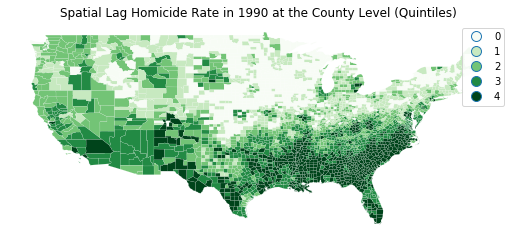

In [23]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='Greens', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Homicide Rate in 1990 at the County Level (Quintiles)")

plt.show()

## Add spatial lag values to data frame

In [38]:
df['lag_hr90'] = ylag
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry,lag_hr90
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,POLYGON ((-95.34258270263672 48.54670333862305...,4.329494
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,POLYGON ((-118.8505020141602 47.94968795776367...,4.486318
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,POLYGON ((-117.4377746582031 48.04421997070313...,6.924771
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,POLYGON ((-118.9709625244141 47.93927764892578...,5.307922
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-117.4375 48.99999618530273, -117.03...",4.638703


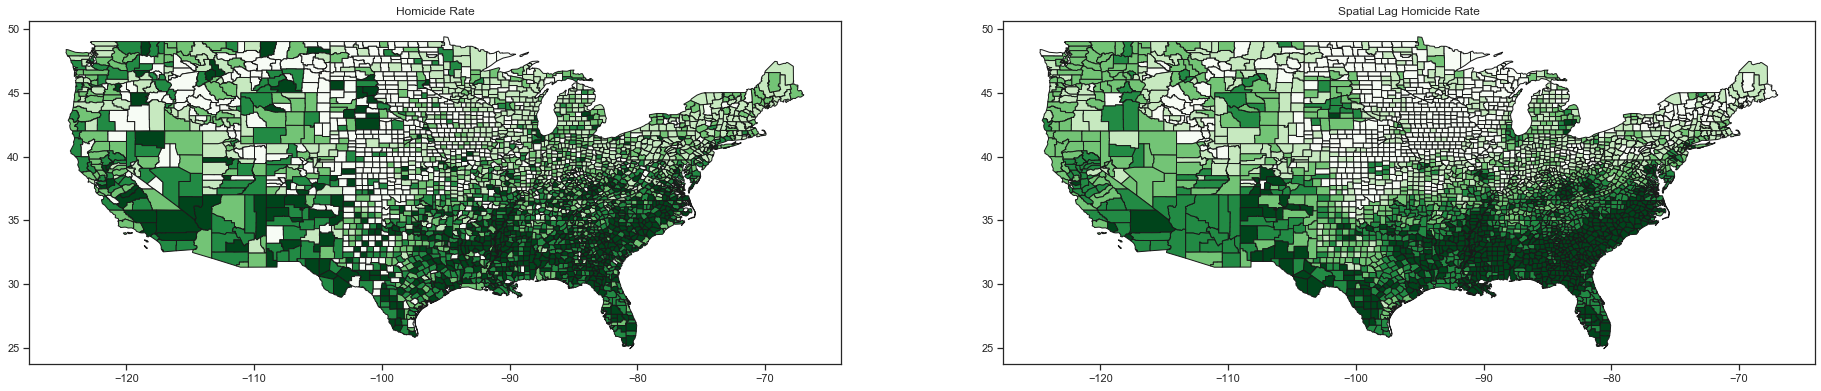

In [44]:
f,ax = plt.subplots(1,2,figsize=(8*4,8))
df.plot(column='HR90', ax=ax[0], edgecolor='k', scheme="quantiles",  k=5, cmap='Greens')
ax[0].set_title("Homicide Rate")
df.plot(column='lag_hr90', ax=ax[1], edgecolor='k', scheme='quantiles', cmap='Greens', k=5)
ax[1].set_title("Spatial Lag Homicide Rate")
plt.show()

## Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

PySAL has many local autocorrelation statistics. Let's compute a local Moran statistic for the same d

In [45]:
np.random.seed(12345)
import esda

In [92]:
wq.transform = 'r'
wq

In [93]:
lag_hr90 = lps.weights.lag_spatial(wq, df['HR90'])

In [94]:
lag_hr90

array([ 4.32949355,  4.4863183 ,  6.92477055, ..., 10.99696046,
        2.7744594 ,  4.01581786])

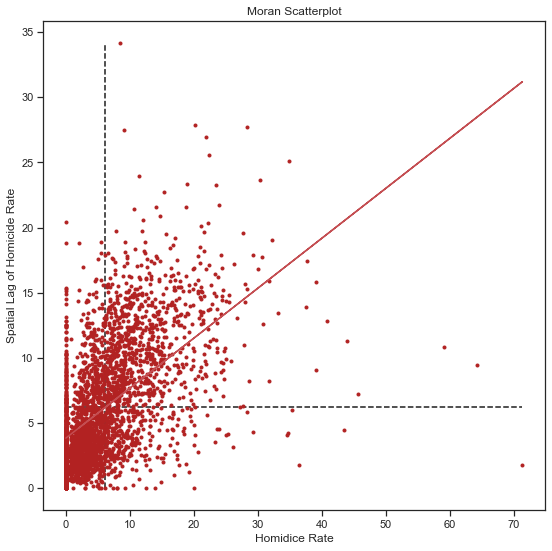

In [95]:
hr90 = df['HR90']
b, a = np.polyfit(hr90, lag_hr90, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(hr90, lag_hr90, '.', color='firebrick')

 # dashed vert at mean of the HR90
plt.vlines(hr90.mean(), lag_hr90.min(), lag_hr90.max(), linestyle='--')
 # dashed horizontal at mean of lagged HR90 
plt.hlines(lag_hr90.mean(), hr90.min(), hr90.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(hr90, a + b*hr90, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Homicide Rate')
plt.xlabel('Homidice Rate')
plt.show()

In [96]:
b, a

(0.38331361120633306, 3.834429713337546)

Now, instead of a single $I$ statistic, we have an *array* of local $I_i$
statistics, stored in the `.Is` attribute, and p-values from the simulation are
in `p_sim`.

In [97]:
lisa = esda.moran.Moran_Local(hr90, wq, permutations=9999)

In [98]:
lisa.q

array([3, 4, 1, ..., 2, 3, 3])

In [99]:
(lisa.p_sim < 0.05).sum()

1173

## Label Cluster Types
We can distinguish the specific type of local spatial association reflected in the four quadrants of the Moran Scatterplot above:

Hot Spots (HH) = High values surrounded by high lag values

Colde Spots (LL) = Low values surrounded by low lag values

Doughnut (LH) = Low values surrounded by high lag values

Diamond (HL) = High values surrounded by low lag values

In [100]:
sig = 1 * (lisa.p_sim < 0.05)
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
(hotspot == 0).sum()

2677

In [102]:
(spots == 1).sum()

408

In [103]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

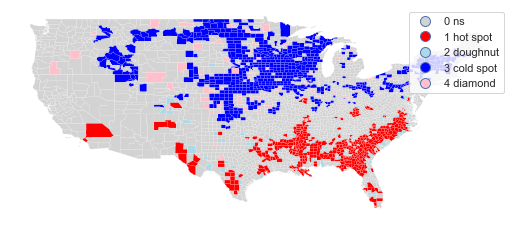

In [106]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 6))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [107]:
df['LISA_p'] = li.p_sim
df['LISA_cluster'] = spots
df['LISA_cluster_labels'] = labels
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,GI89,FH60,FH70,FH80,FH90,geometry,lag_hr90,LISA_p,LISA_cluster,LISA_cluster_labels
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.336455,11.279621,5.4,5.663881,9.515860,POLYGON ((-95.34258270263672 48.54670333862305...,4.329494,0.364,0,0 ns
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.360640,10.053476,2.6,10.079576,11.397059,POLYGON ((-118.8505020141602 47.94968795776367...,4.486318,0.364,0,0 ns
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.369942,9.258437,5.6,6.812127,10.352015,POLYGON ((-117.4377746582031 48.04421997070313...,6.924771,0.326,0,0 ns
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.394519,9.039900,8.1,10.084926,12.840340,POLYGON ((-118.9709625244141 47.93927764892578...,5.307922,0.414,0,0 ns
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-117.4375 48.99999618530273, -117.03...",4.638703,0.358,0,0 ns


## Compare Homicide Rate and Spatial Lag across Cluster Types - Using Box Plot

Seaborn has boxplot option - but requires the data frame to be reformated wide to long.
Use pandas.melt to reshape the data frame from wide format to long format.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html


In [112]:
boxplotdata=pd.melt(df,id_vars=['LISA_cluster_labels'],value_vars=['HR90','lag_hr90'], 
           value_name='Homicide Rate', var_name='Value Type')
boxplotdata.head()

,LISA_cluster_labels,Value Type,Homicide Rate
0,0 ns,HR90,0.000000
1,0 ns,HR90,15.885624
2,0 ns,HR90,6.462453
3,0 ns,HR90,6.996502
4,0 ns,HR90,7.478033


In [113]:
# Homicide Rate Column has both HR90 and Lag HR90 values
boxplotdata['Value Type'].unique()

array(['HR90', 'lag_hr90'], dtype=object)

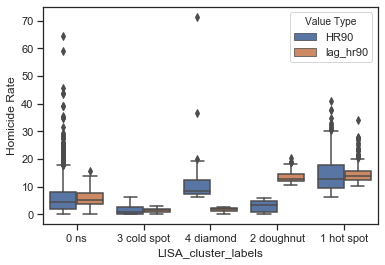

In [114]:
seaborn.boxplot(x='LISA_cluster_labels',y='Homicide Rate',data=boxplotdata,hue='Value Type')

The boxplot above provides evidence that the LISA cluster types follow the expected values. The cold spot Homicide Rates are very low compared to the hot spots. For both cold and hot spots the lag values are similar cold cold and hot hot.

For the diamonds (hot surrounded by cold) and the doughnuts (cold surrounded by hot) the box plot follows the expected patterns.

Of interest is that the not significant clusters have significant outliers with many homicide rates outside of the interquartile range. However, the LISA analysis suggests that these are not spatial clusters, with lag values that are not significantly different.